In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Load all MLB data and combine/merge them into one table

In [4]:
pitches = pd.read_csv("archive/pitches.csv")

In [5]:
atbats = pd.read_csv('archive/atbats.csv')

In [6]:
games = pd.read_csv('games.csv') 

In [7]:
names = pd.read_csv('archive/player_names.csv')

In [8]:
# Merging pitches and atbats by ab_id
data = pd.merge(pitches, atbats, on = 'ab_id', how = 'left')

In [9]:
# Merging games data with pitches and atbats by g_id
data = pd.merge(data, games, on = 'g_id', how = 'left')

In [10]:
data1 = data.g_id.astype('str')

In [11]:
# Since the year is the first four characters, we will isolate those characters
data1 = data1.str[:4]

In [12]:
data['year'] = data1.values

In [13]:
data1718 = data[(data['year'] == '2017') | (data['year'] == '2018')]

In [14]:
data1718 = pd.merge(data1718, names, left_on = 'pitcher_id', right_on = 'id')

In [16]:
data1718.to_csv("data1718.csv")

In [15]:
# start from below, if data17.csv is ready

In [17]:
data1718 = pd.read_csv("data1718.csv")

In [18]:
data1718_merge = pd.DataFrame(data1718[['pitch_type', 'pitcher_id', 'year']])

In [19]:
# drop the outliers
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'AB']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'UN']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'EP']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'SC']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'PO']
data1718_merge = data1718_merge[data1718_merge.pitch_type != 'FO']

In [20]:
data1718_merge.dropna(inplace=True) # now it will actually drop the nan values

In [21]:
data1718_merge.pitch_type.value_counts()

FF    507473
SL    240439
FT    177897
CH    146135
CU    118919
SI    108393
FC     75883
KC     35470
FS     22126
KN      3369
Name: pitch_type, dtype: int64

In [22]:
pitcherid=set()
for i in data1718_merge.pitcher_id:
    pitcherid.add(i)

In [23]:
len(pitcherid)

996

Combining FF and FT to FB (Fastball); KN and KC to KN (Knuckleball)

In [24]:
data1718_merge.pitch_type = data1718_merge.pitch_type.replace({"FF": "FB", "FT": "FB", "KC": "KN"})

In [25]:
data1718_merge.pitch_type.value_counts()

FB    685370
SL    240439
CH    146135
CU    118919
SI    108393
FC     75883
KN     38839
FS     22126
Name: pitch_type, dtype: int64

modified version of proportion calculator (faster)

In [26]:
new_1718 = pd.DataFrame()
new_1718['pitcher_id'] = [i for i in pitcherid]
new_1718

,pitcher_id
0,466948
1,456713
2,622608
3,501789
4,596001
...,...
991,489448
992,475115
993,456696
994,624636


In [27]:
# for indexing purpose, create a dictionary {pitcher_id: index}
pitcher_locator = dict()
for i, row in new_1718.iterrows():
    pitcher_locator[int(row['pitcher_id'])] = i

In [28]:
# MODIFIED: 'FF' and 'FT' becomes 'FB'; 'KN' and 'KC' are combined into 'KN'
# Get the pitch type proportion for each pitcher, from 2017 data
index = data1718_merge.index
new_1718['FB'] = 0
new_1718['SL'] = 0
new_1718['CH'] = 0
new_1718['CU'] = 0
new_1718['SI'] = 0
new_1718['FC'] = 0
new_1718['FS'] = 0
new_1718['KN'] = 0

In [29]:
data1718_merge

,pitch_type,pitcher_id,year
0,FB,593372,2017
1,FB,593372,2017
2,FB,593372,2017
3,SL,593372,2017
4,FB,593372,2017
...,...,...,...
1449057,CU,607054,2018
1449058,CH,607054,2018
1449059,CU,607054,2018
1449060,CU,607054,2018


In [ ]:
'''
for 2017 data, 1 will be added; for 2018 data, 4 will be added
'''
ratio = {2017: 1, 2018: 4}
start = dt.datetime.now()
print("Start:", start)
for _, row in data1718_merge.iterrows():
    # print(row['pitcher_id'], row['pitch_type'])
    # print(pitcher_locator[row['pitcher_id']])
    #print(row['pitch_type'])
    # print("this", pitcher_locator[row['pitcher_id']], row['pitch_type'])
    new_1718.loc[pitcher_locator[row['pitcher_id']], str(row['pitch_type'])] += ratio[row['year']]
print("End:", dt.datetime.now())
print()
print("It took...", dt.datetime.now() - start)

In [24]:
proportion = new_1718.iloc[:, 1:].div(new_1718.iloc[:, 1:].sum(axis=1), axis=0)

In [25]:
proportion['pitcher_id'] = [i for i in pitcherid]
cols = proportion.columns.tolist()
cols = cols[-1:] + cols[:-1]
proportion = proportion[cols]

In [26]:
proportion

,pitcher_id
0,466948
1,456713
2,622608
3,501789
4,596001
...,...
991,489448
992,475115
993,456696
994,624636


In [33]:
'''
IMPORTANT: proportion is the actual proportion of the pitches;
new_1718 contains the raw number of pitches
'''
proportion.to_csv("new_1718.csv")

In [34]:
new_1718.iloc[:, 1:]

,FB,SL,CH,CU,SI,FC,FS,KN
0,57,1,38,11,0,0,0,0
1,1721,45,5,514,0,319,0,0
2,5519,1647,596,576,0,0,0,0
3,345,0,0,1540,0,2330,0,0
4,4075,4208,765,997,2828,0,0,0
...,...,...,...,...,...,...,...,...
991,120,28,0,12,0,0,0,0
992,5650,4474,130,0,0,700,0,0
993,2674,927,148,949,0,0,0,0
994,0,0,28,8,0,0,0,0


old version of proportion calculator

In [35]:
'''
# Get the pitch type proportion for each pitcher, from 2017 data
start = dt.datetime.now()
print("Start:", start)
FF = 0
SL = 0
FT = 0
CH = 0
CU = 0
SI = 0
FC = 0
KC = 0
FS = 0
KN = 0
index = data17_merge.index
tempid = ""
count = 0
new_17['FF'] = np.nan
new_17['SL'] = np.nan
new_17['FT'] = np.nan
new_17['CH'] = np.nan
new_17['CU'] = np.nan
new_17['SI'] = np.nan
new_17['FC'] = np.nan
new_17['KC'] = np.nan
new_17['FS'] = np.nan
new_17['KN'] = np.nan
for j in pitcherid:
    for i in index:
        if data17_merge.loc[i, "pitcher_id"] == j:     
            if data17_merge.loc[i, "pitch_type"] == "FF":
                FF += 1
            elif data17_merge.loc[i, "pitch_type"] == "SL":
                SL += 1
            elif data17_merge.loc[i, "pitch_type"] == "FT":
                FT += 1
            elif data17_merge.loc[i, "pitch_type"] == "CH":
                CH += 1
            elif data17_merge.loc[i, "pitch_type"] == "CU":
                CU += 1
            elif data17_merge.loc[i, "pitch_type"] == "SI":
                SI += 1
            elif data17_merge.loc[i, "pitch_type"] == "FC":
                FC += 1
            elif data17_merge.loc[i, "pitch_type"] == "KC":
                KC += 1
            elif data17_merge.loc[i, "pitch_type"] == "FS":
                FS += 1
            elif data17_merge.loc[i, "pitch_type"] == "KN":
                KN += 1
    total = FF+SL+FT+CH+CU+SI+KC+FS+KN+FC
    new_17.loc[count, "FF"] = FF/total
    new_17.loc[count, "SL"] = SL/total
    new_17.loc[count, "FT"] = FT/total
    new_17.loc[count, "CH"] = CH/total
    new_17.loc[count, "CU"] = CU/total
    new_17.loc[count, "SI"] = SI/total
    new_17.loc[count, "FC"] = FC/total
    new_17.loc[count, "KC"] = KC/total
    new_17.loc[count, "FS"] = FS/total
    new_17.loc[count, "KN"] = KN/total
    FF = 0
    SL = 0
    FT = 0
    CH = 0
    CU = 0
    SI = 0
    FC = 0
    KC = 0
    FS = 0
    KN = 0
    count+=1
print("End:", dt.datetime.now())
print()
print("It took...", dt.datetime.now() - start)
'''

'\n# Get the pitch type proportion for each pitcher, from 2017 data\nstart = dt.datetime.now()\nprint("Start:", start)\nFF = 0\nSL = 0\nFT = 0\nCH = 0\nCU = 0\nSI = 0\nFC = 0\nKC = 0\nFS = 0\nKN = 0\nindex = data17_merge.index\ntempid = ""\ncount = 0\nnew_17[\'FF\'] = np.nan\nnew_17[\'SL\'] = np.nan\nnew_17[\'FT\'] = np.nan\nnew_17[\'CH\'] = np.nan\nnew_17[\'CU\'] = np.nan\nnew_17[\'SI\'] = np.nan\nnew_17[\'FC\'] = np.nan\nnew_17[\'KC\'] = np.nan\nnew_17[\'FS\'] = np.nan\nnew_17[\'KN\'] = np.nan\nfor j in pitcherid:\n    for i in index:\n        if data17_merge.loc[i, "pitcher_id"] == j:     \n            if data17_merge.loc[i, "pitch_type"] == "FF":\n                FF += 1\n            elif data17_merge.loc[i, "pitch_type"] == "SL":\n                SL += 1\n            elif data17_merge.loc[i, "pitch_type"] == "FT":\n                FT += 1\n            elif data17_merge.loc[i, "pitch_type"] == "CH":\n                CH += 1\n            elif data17_merge.loc[i, "pitch_type"] == "CU

In [36]:
# data17_merge.loc[724615, "pitch_type"]

In [37]:
# data17_merge

In [38]:
# DEPRECATED
# export the pitch type proportion for each pitcher, from 2017 2018 data, into a new csv file
# new_1718.to_csv("new_1718.csv")

In [39]:
# continue from below, if "new_1718.csv" already available
# --------------------------------------------

In [30]:
new_1718 = pd.read_csv("new_1718.csv")

In [31]:
# Using only 2018 year
data18 = data[data['year'] == '2018']

In [32]:
new_1718

,Unnamed: 0,pitcher_id,FB,SL,CH,CU,SI,FC,FS,KN
0,0,466948,0.532710,0.009346,0.355140,0.102804,0.000000,0.000000,0.000000,0.000000
1,1,456713,0.660906,0.017281,0.001920,0.197389,0.000000,0.122504,0.000000,0.000000
2,2,622608,0.661909,0.197529,0.071480,0.069081,0.000000,0.000000,0.000000,0.000000
3,3,501789,0.081851,0.000000,0.000000,0.365362,0.000000,0.552788,0.000000,0.000000
4,4,596001,0.316554,0.326886,0.059427,0.077449,0.219685,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
991,991,489448,0.750000,0.175000,0.000000,0.075000,0.000000,0.000000,0.000000,0.000000
992,992,475115,0.515793,0.408435,0.011868,0.000000,0.000000,0.063904,0.000000,0.000000
993,993,456696,0.569178,0.197318,0.031503,0.202001,0.000000,0.000000,0.000000,0.000000
994,994,624636,0.000000,0.000000,0.777778,0.222222,0.000000,0.000000,0.000000,0.000000


In [33]:
new_1718.loc[0, "pitcher_id"]

466948

In [34]:
# Merging the data with names
data18 = pd.merge(data18, names, left_on = 'pitcher_id', right_on = 'id')

In [35]:
# Making speed as numeric
data18['speed'] = data18['speed'].str[:-3]
data18['speed'] = data18.speed.astype('int')

In [36]:
# Changing to numeric
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
data18['venue_name'] = number.fit_transform(data18['venue_name'])
data18['condition'] = number.fit_transform(data18['condition'])

In [37]:
# function that is used to label:
# 1 if the wind condition is in advantage of hitter (Out);
# 2 if the wind condition is in advantage of pitcher (In);
# 0 if neutral
def wind_direction(row):
    if row['direction'][:1] == 'O':
        return 1
    elif row['direction'][:1] == 'I':
        return 2
    else:
        return 0

In [38]:
# Changind dirction value to 0,1,2
data18['direction'] = data18.apply(wind_direction, axis=1)

In [49]:
# do the same for pitch codes

In [39]:
data1718['code']

0          B
1          F
2          B
3          D
4          C
          ..
1449057    B
1449058    C
1449059    B
1449060    F
1449061    S
Name: code, Length: 1449062, dtype: object

In [40]:
# function that is used to label:
# 1 if in-play; out,
# 2 if in-play; no out,
# 3 if in-play; runs,
# 4 if hit by pitch,
# 0 if else
def last_pitch(row):
    if row['code'] == 'X':
        return 1
    elif row['code'] == 'D':
        return 2
    elif row['code'] == 'E':
        return 3
    elif row['code'] == 'H':
        return 4
    else:
        return 0

In [41]:
data18['code'] = data18.apply(last_pitch, axis=1)

In [42]:
data18['code'].value_counts()

0    596228
1     81801
2     28526
3     15967
4      1922
Name: code, dtype: int64

In [43]:
new_data = pd.DataFrame(data18[['pitch_type', 'b_score', 's_count', 'outs', 'pitch_num', \
                            'on_1b', 'on_2b', 'on_3b', 'batter_id', 'inning', 'p_score', 'p_throws',\
                             'pitcher_id', 'stand', 'top', 'b_count',\
                          'venue_name','speed', 'direction',\
                          'temperature', 'condition', 'code']])

In [55]:
pXs = new_data.to_csv("pXs.csv")

Now we can get more specific with our scrubbing to further clean our dataset. We will create a new DataFrame called pXs (pitch X situation) and reduce our columns to game situational data. As much of the pitches file is individual statistics on the pitch thrown, it would defeat the purpose of attempting to predict a pitch if the data of the pitch was provided.

In [44]:
pXs = pd.read_csv("pXs.csv", index_col=[0])

In [45]:
pXs = pXs.dropna()

In [46]:
pXs

,pitch_type,b_score,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,inning,...,pitcher_id,stand,top,b_count,venue_name,speed,direction,temperature,condition,code
0,SI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,446359,1,...,608665,R,True,0.0,22,2,1,73,5,0
1,SI,0.0,1.0,0.0,2.0,0.0,0.0,0.0,446359,1,...,608665,R,True,0.0,22,2,1,73,5,0
2,SI,0.0,1.0,0.0,3.0,0.0,0.0,0.0,446359,1,...,608665,R,True,1.0,22,2,1,73,5,0
3,SL,0.0,2.0,0.0,4.0,0.0,0.0,0.0,446359,1,...,608665,R,True,1.0,22,2,1,73,5,0
4,SI,0.0,2.0,0.0,5.0,0.0,0.0,0.0,446359,1,...,608665,R,True,1.0,22,2,1,73,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724439,CU,19.0,0.0,2.0,1.0,1.0,0.0,0.0,543877,8,...,607054,R,False,0.0,12,20,1,83,5,0
724440,CH,19.0,0.0,2.0,2.0,1.0,0.0,0.0,543877,8,...,607054,R,False,1.0,12,20,1,83,5,0
724441,CU,19.0,1.0,2.0,3.0,1.0,0.0,0.0,543877,8,...,607054,R,False,1.0,12,20,1,83,5,0
724442,CU,19.0,1.0,2.0,4.0,1.0,0.0,0.0,543877,8,...,607054,R,False,2.0,12,20,1,83,5,0


In [47]:
pXs = pd.merge(pXs, new_1718, on = 'pitcher_id')

In [48]:
new_1718

,Unnamed: 0,pitcher_id,FB,SL,CH,CU,SI,FC,FS,KN
0,0,466948,0.532710,0.009346,0.355140,0.102804,0.000000,0.000000,0.000000,0.000000
1,1,456713,0.660906,0.017281,0.001920,0.197389,0.000000,0.122504,0.000000,0.000000
2,2,622608,0.661909,0.197529,0.071480,0.069081,0.000000,0.000000,0.000000,0.000000
3,3,501789,0.081851,0.000000,0.000000,0.365362,0.000000,0.552788,0.000000,0.000000
4,4,596001,0.316554,0.326886,0.059427,0.077449,0.219685,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
991,991,489448,0.750000,0.175000,0.000000,0.075000,0.000000,0.000000,0.000000,0.000000
992,992,475115,0.515793,0.408435,0.011868,0.000000,0.000000,0.063904,0.000000,0.000000
993,993,456696,0.569178,0.197318,0.031503,0.202001,0.000000,0.000000,0.000000,0.000000
994,994,624636,0.000000,0.000000,0.777778,0.222222,0.000000,0.000000,0.000000,0.000000


In [49]:
pXs.isna().sum()

pitch_type     0
b_score        0
s_count        0
outs           0
pitch_num      0
on_1b          0
on_2b          0
on_3b          0
batter_id      0
inning         0
p_score        0
p_throws       0
pitcher_id     0
stand          0
top            0
b_count        0
venue_name     0
speed          0
direction      0
temperature    0
condition      0
code           0
Unnamed: 0     0
FB             0
SL             0
CH             0
CU             0
SI             0
FC             0
FS             0
KN             0
dtype: int64

In [50]:
# Drop that has null pitch_type
pXs = pXs.dropna()

In [51]:
# Changing values to numeric
pXs.p_throws = pXs.p_throws.replace(['R', 'L'], [0,1])
pXs.stand = pXs.stand.replace(['R', 'L'], [0,1])
pXs.top = pXs.top.replace([True, False], [1,0])

In [52]:
pXs.pitch_type.value_counts()

FF    254086
SL    122796
FT     81617
CH     74606
CU     60360
SI     57970
FC     39061
KC     16327
FS     10365
KN       719
EP       204
PO        89
FO        84
SC        37
AB         1
Name: pitch_type, dtype: int64

In [53]:
# Deleting pitch types that have low value counts
pXs = pXs[pXs.pitch_type != 'AB']
pXs = pXs[pXs.pitch_type != 'UN']
pXs = pXs[pXs.pitch_type != 'EP']
pXs = pXs[pXs.pitch_type != 'SC']
pXs = pXs[pXs.pitch_type != 'PO']
pXs = pXs[pXs.pitch_type != 'FO']

In [54]:
pXs.pitch_type = pXs.pitch_type.replace({"FF": "FB", "FT": "FB", "KC": "KN"})

In [67]:
# Recency Feature
from sklearn.preprocessing import LabelEncoder
def recency(depth):
    number = LabelEncoder()
    for a in range(depth):
        pXs["t-"+str(a+1)+" pitch_type"] = np.nan
    index = pXs.index 
    print(index)
    for j in range(len(index)-depth):
        if pXs.loc[index[j+depth], "pitcher_id"] == pXs.loc[index[j], "pitcher_id"]:
            for c in range(depth):
                past = pXs.loc[index[j+depth-c-1]]
                pXs.loc[index[j+depth], "t-"+str(c+1)+" pitch_type"] = past.pitch_type
    for d in range(depth):
        pXs['t-'+str(d+1)+' pitch_type'] = pXs['t-'+str(d+1)+' pitch_type'].astype('str')             
        pXs['t-'+str(d+1)+' pitch_type'] = number.fit_transform(pXs['t-'+str(d+1)+' pitch_type'])
recency(3)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            718312, 718313, 718314, 718315, 718316, 718317, 718318, 718319,
            718320, 718321],
           dtype='int64', length=717907)


In [68]:
pXs.to_csv("recency_feature.csv")

In [53]:
pXs.head(20)

,pitch_type,b_score,s_count,outs,pitch_num,on_1b,on_2b,on_3b,batter_id,inning,...,code,Unnamed: 0,FB,SL,CH,CU,SI,FC,FS,KN
0,SI,0.0,0.0,0.0,1.0,0.0,0.0,0.0,446359,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
1,SI,0.0,1.0,0.0,2.0,0.0,0.0,0.0,446359,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
2,SI,0.0,1.0,0.0,3.0,0.0,0.0,0.0,446359,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
3,SL,0.0,2.0,0.0,4.0,0.0,0.0,0.0,446359,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
4,SI,0.0,2.0,0.0,5.0,0.0,0.0,0.0,446359,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
5,SI,0.0,0.0,1.0,1.0,0.0,0.0,0.0,545361,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
6,FB,0.0,1.0,1.0,2.0,0.0,0.0,0.0,545361,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
7,FC,0.0,1.0,1.0,3.0,0.0,0.0,0.0,545361,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
8,SI,0.0,2.0,1.0,4.0,0.0,0.0,0.0,545361,1,...,1,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0
9,SI,0.0,0.0,2.0,1.0,0.0,0.0,0.0,457708,1,...,0,213,0.024748,0.100192,0.133109,0.0,0.600192,0.141759,0.0,0.0


In [75]:
# pXs = pXs.head(10000)

In [55]:
df = pXs

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717907 entries, 0 to 718321
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   pitch_type   717907 non-null  object 
 1   b_score      717907 non-null  float64
 2   s_count      717907 non-null  float64
 3   outs         717907 non-null  float64
 4   pitch_num    717907 non-null  float64
 5   on_1b        717907 non-null  float64
 6   on_2b        717907 non-null  float64
 7   on_3b        717907 non-null  float64
 8   batter_id    717907 non-null  int64  
 9   inning       717907 non-null  int64  
 10  p_score      717907 non-null  int64  
 11  p_throws     717907 non-null  int64  
 12  pitcher_id   717907 non-null  int64  
 13  stand        717907 non-null  int64  
 14  top          717907 non-null  int64  
 15  b_count      717907 non-null  float64
 16  venue_name   717907 non-null  int64  
 17  speed        717907 non-null  int64  
 18  direction    717907 non-

In [57]:
features = pXs.drop('pitch_type', axis=1)

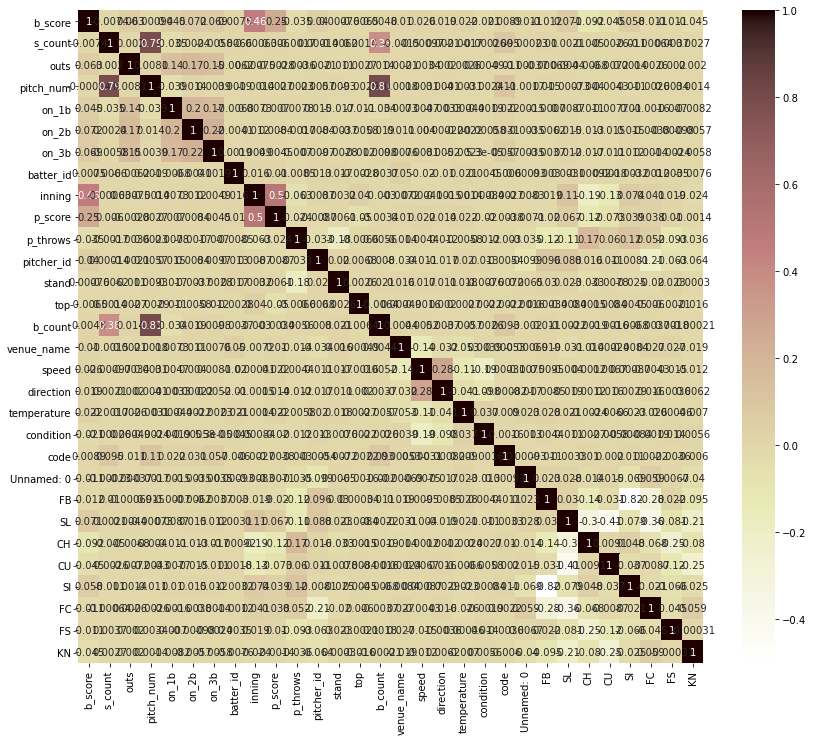

In [59]:
correlation = features.corr() 
plt.figure(figsize=(14,12)) 
heatmap = sns.heatmap(correlation, annot=True, linewidths = 0, vmin=-.5, cmap='pink_r')

In [58]:
# Drop pitch_num by looking at the correlation plots 
# pitch_num has strong correlation with b_count, s_count
features = features.drop('pitch_num', axis=1)

In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717907 entries, 0 to 718321
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   b_score      717907 non-null  float64
 1   s_count      717907 non-null  float64
 2   outs         717907 non-null  float64
 3   on_1b        717907 non-null  float64
 4   on_2b        717907 non-null  float64
 5   on_3b        717907 non-null  float64
 6   batter_id    717907 non-null  int64  
 7   inning       717907 non-null  int64  
 8   p_score      717907 non-null  int64  
 9   p_throws     717907 non-null  int64  
 10  pitcher_id   717907 non-null  int64  
 11  stand        717907 non-null  int64  
 12  top          717907 non-null  int64  
 13  b_count      717907 non-null  float64
 14  venue_name   717907 non-null  int64  
 15  speed        717907 non-null  int64  
 16  direction    717907 non-null  int64  
 17  temperature  717907 non-null  int64  
 18  condition    717907 non-

In [60]:
# y value = pitch_type
target = df['pitch_type']

In [61]:
example = features

In [62]:
target_e = target

In [63]:
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score
import xgboost as xgb
import random
from sklearn.model_selection import GridSearchCV

In [65]:
#splitting the train and test data for the XGB model
X_train, X_test, y_train, y_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
#create xgb instance out of the box
clf = xgb.XGBClassifier(eval_metric='mlogloss')
#fit data
clf.fit(X_train, y_train)
#make predictions
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
#run classification report and confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
print(gbt_confusion_matrix)
gbt_classification_report = classification_report(y_test, val_preds)
print(gbt_classification_report)

[[  846   120  5202   188     9    84   856   217]
 [  110   602  4345   230    12     4   528   234]
 [  440   359 29299   487   253   195   441  2101]
 [  138    87  1835  1281    15   103   355    66]
 [    4     9   578    10   365     3    21    48]
 [   42     0   880    45    11   530   127    34]
 [  229   142   294   128    13    66  4555   334]
 [   86    50  7808   129    42    20   974  3172]]
              precision    recall  f1-score   support

          CH       0.45      0.11      0.18      7522
          CU       0.44      0.10      0.16      6065
          FB       0.58      0.87      0.70     33575
          FC       0.51      0.33      0.40      3880
          FS       0.51      0.35      0.42      1038
          KN       0.53      0.32      0.40      1669
          SI       0.58      0.79      0.67      5761
          SL       0.51      0.26      0.34     12281

    accuracy                           0.57     71791
   macro avg       0.51      0.39      0.41     7

In [83]:
# Doesn't work with n_jobs=-1. 
# 만약 계속 안되면 n_jobs=1로 해보셈
clf = xgb.XGBClassifier(eval_metric='mlogloss')
#clf.fit(X_train, y_train)
Xgb_train, Xgb_test, yxgb_train, yxgb_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
xgb_param_grid = {"learning_rate": [0.1,1],'max_depth': [2,6],'min_child_weight': [5,10],'n_estimators': [50, 100]}
gs = GridSearchCV(clf, xgb_param_grid, n_jobs=1, cv=3)
gs.fit(Xgb_train, yxgb_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample

In [84]:
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 100}

In [66]:
# put the parameter inside XGBClassifier that u got from gs.best_param
X_train, X_test, y_train, y_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
#create xgb instance with parameters
clf = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,min_child_weight=5,n_estimators=100)
#fit data
clf.fit(X_train, y_train)
#make predictions
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
#run classification report and confusion matrix
gbt_confusion_matrix = confusion_matrix(y_test, val_preds)
print(gbt_confusion_matrix)
gbt_classification_report = classification_report(y_test, val_preds)
print(gbt_classification_report)

[23:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  644    98  5429   177     9    73   884   208]
 [   92   458  4498   217    12     4   566   218]
 [  294   272 29807   450   219   151   436  1946]
 [  125    87  1932  1193    19    94   368    62]
 [    5     9   603    10   344     0    23    44]
 [   42     0   940    52    14   459   132    30]
 [  189   109   311   134    16    65  4603   334]
 [   72    33  8034   125    41    16   992  2968]]
              precision    recall  f1-score   support

          CH       0.44      0.09      0.14      7522
          CU       0.43      0.08      0.13      6065
          FB       0.58      0.89      0.70     33575
          FC       0.51      0.31      0.38      3880
         

In [1]:
features.info()

NameError: name 'features' is not defined

In [87]:
# XGBoost with multi:softprob option

In [72]:
le = LabelEncoder()
le.fit(target)
target_num = le.transform(target)
# list(le.inverse_transform(target_num)) #If you wish to retrieve the original descriptive labels post production

X_train, X_test, y_train, y_test = train_test_split(features, target_num, test_size=0.3, random_state=42)

# use DMatrix for xgboost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
fit = xgb.XGBClassifier(objective = 'multi:softprob', eval_metric = 'merror')
fit.fit(X_train,y_train)

# set xgboost params
param = {
'max_depth': 10,  # the maximum depth of each tree
'learning_rate': 0.1,  # the training step for each iteration
'min_child_weight': 20,
'n_estimators': 300,
'objective': 'multi:softprob',  # error evaluation for multiclass training
'eval_metric': 'merror', # ADDED
'num_class': 10, # the number of classes that exist in this datset
'num_rounds': 30}  


#------------- numpy array ------------------

#training and testing - numpy matrices
bst = xgb.train(param, dtrain)
preds = bst.predict(dtest)

#extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Numpy array test precision:", precision_score(y_test, best_preds, average='macro'))

[00:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimators", "num_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Numpy array test precision: 0.5087833916072826


In [89]:
xgb_param_grid = {'max_depth': [10,13],'min_child_weight': [15,20] \
                  ,'n_estimators': [250,300], 'num_rounds': [30,60,90]}
gs = GridSearchCV(fit, xgb_param_grid, n_jobs=-1, cv=3)
gs.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:55:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_rounds" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, eval_metric='merror',
                                     gamma=0, gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=6,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, subsample=1,


In [90]:
gs.best_params_

{'max_depth': 10,
 'min_child_weight': 20,
 'n_estimators': 250,
 'num_rounds': 30}

In [91]:
preds.shape

(215373, 10)

In [92]:
print(preds[:7])

[[0.03890686 0.09104549 0.7325737  0.01410727 0.0141001  0.01409607
  0.01410017 0.05288158 0.01409438 0.01409438]
 [0.11713957 0.01521331 0.6740598  0.07438342 0.01518818 0.01518384
  0.01518826 0.04327959 0.01518202 0.01518202]
 [0.01093814 0.03013653 0.8054743  0.08801582 0.01090491 0.01090179
  0.01090496 0.01092264 0.01090048 0.01090048]
 [0.25073    0.01745642 0.54160345 0.01601203 0.01600389 0.01599932
  0.01600398 0.09419613 0.0159974  0.0159974 ]
 [0.01752513 0.11398576 0.3890661  0.01748076 0.01747188 0.01746689
  0.01747197 0.37460187 0.01746479 0.01746479]
 [0.01496699 0.0149462  0.69557357 0.09782613 0.01492151 0.01491725
  0.01492159 0.10209584 0.01491546 0.01491546]
 [0.17110209 0.03254268 0.6852347  0.01256691 0.01256053 0.01255694
  0.0125606  0.03576465 0.01255544 0.01255544]]


In [93]:
#creating a dataframe for plotting purposes
plot = pd.DataFrame(data=preds[:,:], columns=['Changeup', 'Curveball', 'Cutter', 'Fastball_4S', \
                          'Splitter', 'Fastball_2S', 'Knucklecurve', 'Knuckleball', 'Sinker', \
                                              'Slider'])

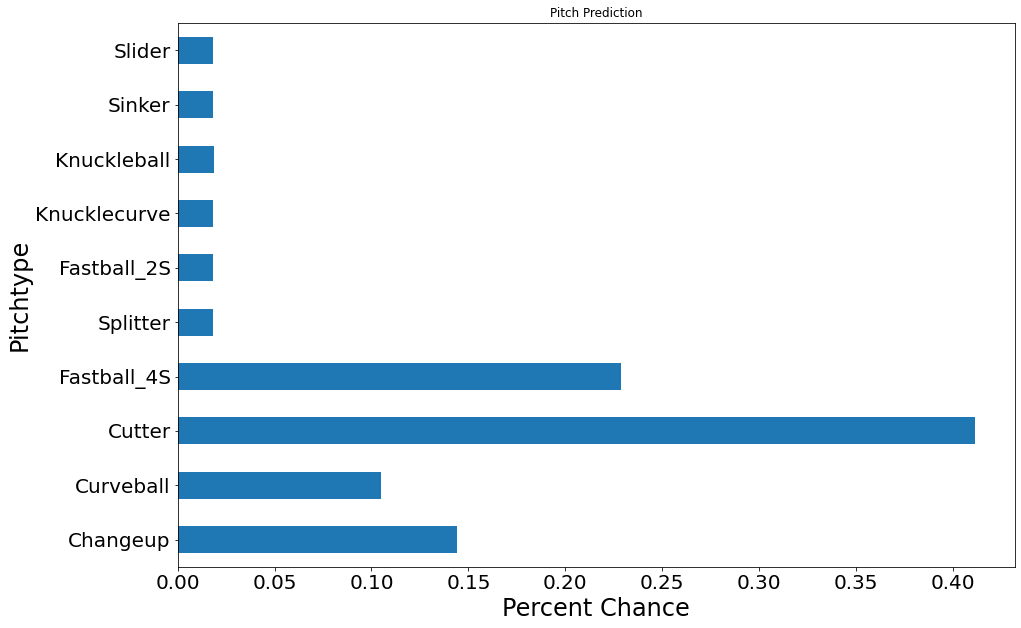

In [94]:
ax = plot.iloc[23].plot(kind='barh',title ="Pitch Prediction", figsize=(15, 10), fontsize=20)
ax.set_xlabel("Percent Chance", fontsize=24)
ax.set_ylabel("Pitchtype", fontsize=24)
plt.show()

In [95]:
# KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_error = []
# Calculating error for K values of 1,4,9,16,25,36,49,64,81,100
for i in range(1, 50):
    #print(i**2)
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    test_error.append(np.mean(pred_i != y_test))
a = min(test_error)
for i in range(0,len(test_error)):
    if test_error[i]==a:
        print(i)

1
2
3
4
5
6
7
8
9
10


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), test_error, color='grey', linestyle='dashed', marker='o', 
         markerfacecolor='black', markersize=7, label='Testing Set Error Rate')
plt.legend(fontsize = 15)
plt.title('Error Rate K Value', fontsize = 20)
plt.xlabel('K Value', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [ ]:
print(a)

In [ ]:
# Put the number that you got from KNN to n_neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,zero_division=True))

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_test, y_test)

accuracy_score(y_train, model.predict(X_train))

In [ ]:
#creating a dataframe for plotting purposes
plot = pd.DataFrame(data=val_preds[:,:], columns=['Changeup', 'Curveball', 'Cutter', 'Fastball_4S', 'Splitter', 'Fastball_2S', 'Knucklecurve', 'Knuckleball', 'Sinker', 'Slider'])

#visualization function
def pitch_pred(data):
    print(X_test.iloc[data])
    ax = plot.iloc[data].plot(kind='barh',title ="Pitch Prediction",     figsize=(15, 10), fontsize=20)
    ax.set_xlabel("Percent Chance", fontsize=24)
    ax.set_ylabel("Pitchtype", fontsize=24)
    plt.show()
pitch_pred(3333)

In [ ]:
val_preds

In [85]:
X_train, X_test, y_train, y_test = train_test_split(example, target_e, test_size=0.10, random_state = 77777)

In [72]:
!pip install daal4py

In [86]:
from daal4py.sklearn import patch_sklearn
patch_sklearn()

dispatcher.py:151: FutureWarning: 
Scikit-learn patching with daal4py is deprecated and will be removed in the future.
Use Intel(R) Extension for Scikit-learn* module instead (pip install scikit-learn-intelex).
To enable patching, please use one of the following options:
1) From the command line:
    python -m sklearnex <your_script>
2) From your script:
    from sklearnex import patch_sklearn
    patch_sklearn()
Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [ ]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)